In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\SANATH\Downloads\DEEP_Learning\income_evaluation.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df=df.drop_duplicates(keep='first')

In [6]:
df.duplicated(keep='first').sum()

0

In [7]:
df.shape

(32537, 15)

In [8]:
df.columns=df.columns.str.strip()

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
# Removing leading spaces in all fetaures
df['workclass'] = df['workclass'].str.strip()
df['education'] = df['education'].str.strip()
df['marital-status'] = df['marital-status'].str.strip()
df['occupation'] = df['occupation'].str.strip()
df['sex'] = df['sex'].str.strip()
df['native-country'] = df['native-country'].str.strip()
df['race'] = df['race'].str.strip()
df['income'] = df['income'].str.strip()

In [12]:
# Replacing ? with unknown in each column
df['occupation'] = df['occupation'].str.strip().replace('?','unknown')
df['workclass'] = df['workclass'].str.strip().replace('?','unknown')
df['native-country'] = df['native-country'].str.strip().replace('?','Unknown')

In [13]:
# Replacing string with descrete values 
df['sex'] = df['sex'].map({"Female":0,"Male":1}).astype(int)
df['income'] = df['income'].map({"<=50K":0,">50K":1}).astype(int)
print(df['income'].unique())

[0 1]


In [14]:
df['sex'].unique()

array([1, 0])

## Univariate analysis
* AGE

In [15]:
print(df['age'].min())
print(df['age'].max())
print(df['age'].median())
print(df['age'].mean())
print(df['age'].std())


17
90
37.0
38.585548759873376
13.637983518469866


* The mean and median are near may be there are few or no outliers in 'AGE' column.

<AxesSubplot:>

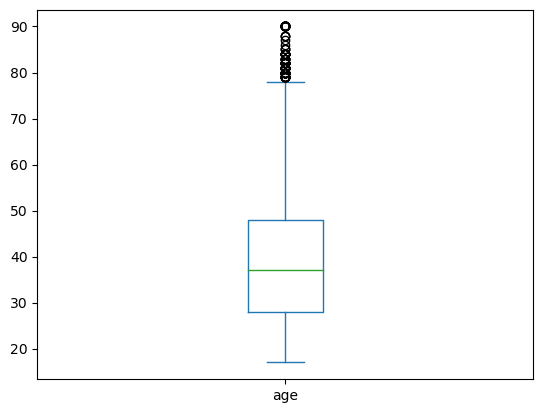

In [16]:
df['age'].plot(kind='box')

* There are few outliers in 'age' column

In [17]:
df=df[df['age']<70]

<AxesSubplot:>

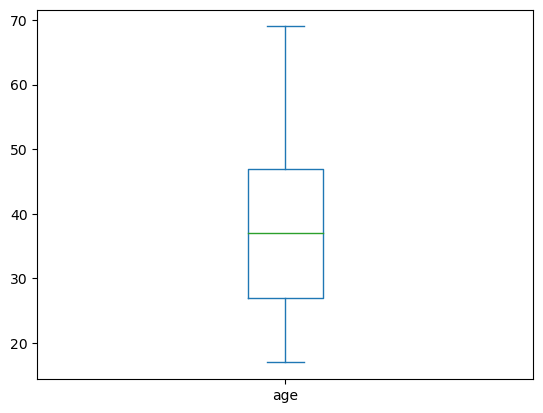

In [18]:
df['age'].plot(kind='box')

<AxesSubplot:ylabel='Density'>

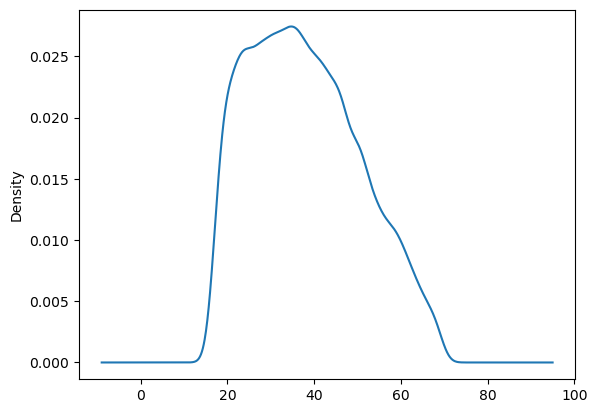

In [19]:
df['age'].plot(kind='kde')

* The kde plot look like symmentric in shape

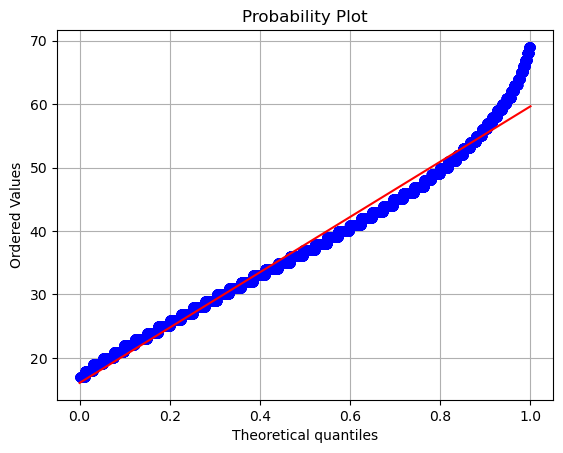

In [20]:
stats.probplot(df['age'],dist='uniform',plot=plt)
plt.grid()

* The majority of data points are lied on the line. So the data is uniformely  distributed

### workclass

<AxesSubplot:>

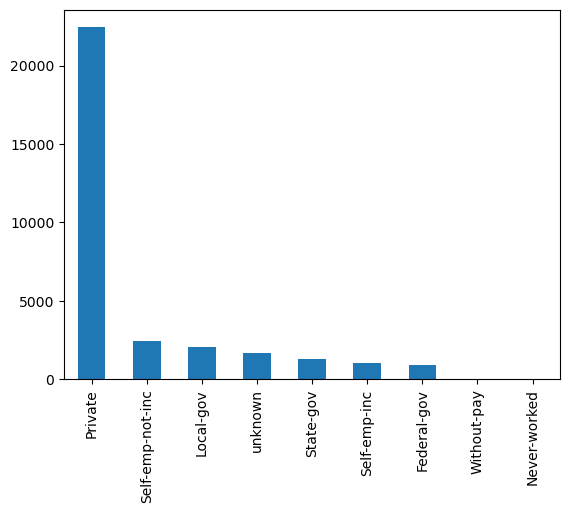

In [21]:
df['workclass'].value_counts().plot(kind='bar')

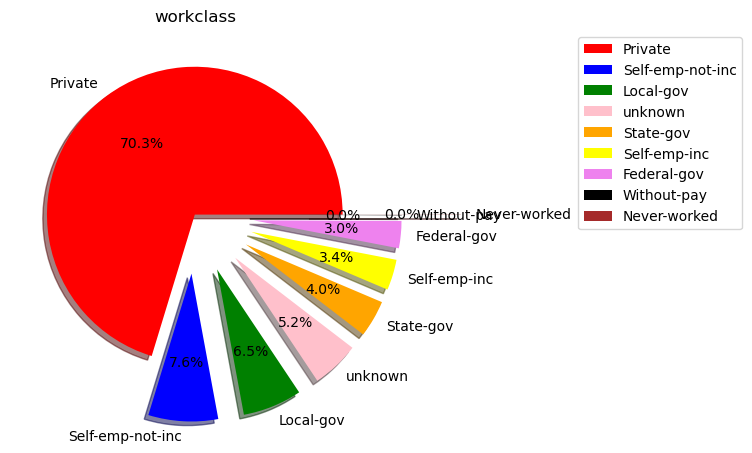

In [23]:
workclass=df['workclass'].value_counts()
colors=['red','blue','green','pink','orange','yellow','violet','black','brown']
explode=[0,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.8]
plt.pie(workclass,labels=workclass.index,colors=colors,explode=explode,shadow=True,autopct="%1.1f%%")
plt.title('workclass')
plt.legend(labels=workclass.index)
plt.legend(bbox_to_anchor=(2,1))     # it help to give the names beside the plot
plt.show()

### education

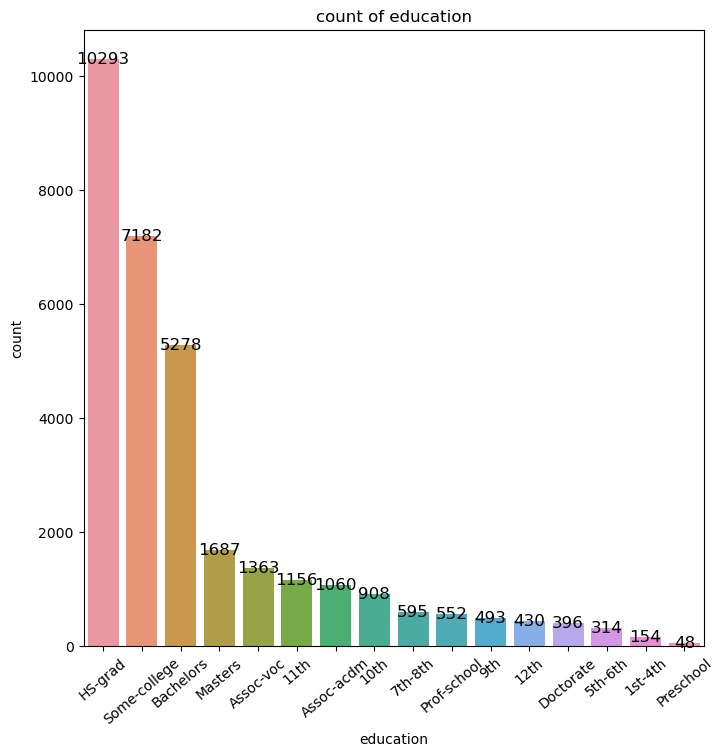

In [24]:
value_counts=df['education'].value_counts()
plt.figure(figsize=(8,8))
ax=sns.barplot(x=value_counts.index,y=value_counts.values)
plt.xlabel('education')
plt.ylabel('count')
plt.title('count of education')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',(p.get_x()+ p.get_width()/2.,p.get_height()),ha='center',va='center',fontsize=12,color='black')
plt.xticks(rotation=40)
plt.show()    

### marital-status

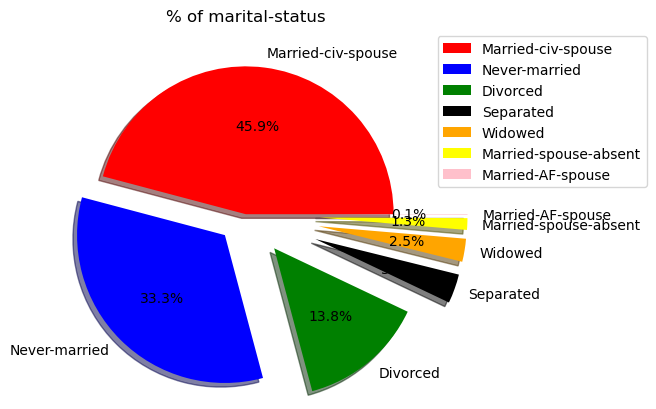

In [25]:
maritalstatus=df['marital-status'].value_counts()
colors=['red','blue','green','black','orange','yellow','pink']
explode=[0,0.2,0.3,0.5,0.5,0.5,0.5]
plt.pie(maritalstatus,labels=maritalstatus.index,colors=colors,explode=explode,shadow=True,autopct="%1.1f%%")
plt.title('% of marital-status')
plt.legend(labels=maritalstatus.index)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

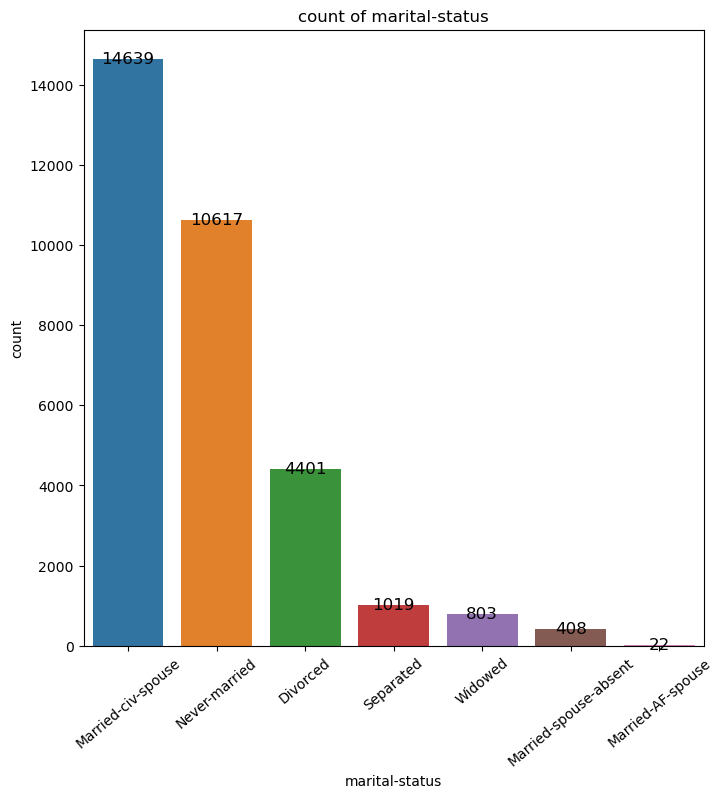

In [26]:
value_counts=df['marital-status'].value_counts()
plt.figure(figsize=(8,8))
ax=sns.barplot(x=value_counts.index,y=value_counts.values)
plt.xlabel('marital-status')
plt.ylabel('count')
plt.title('count of marital-status')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',(p.get_x()+ p.get_width()/2.,p.get_height()),ha='center',va='center',fontsize=12,color='black')
plt.xticks(rotation=40)
plt.show()    

### occupation

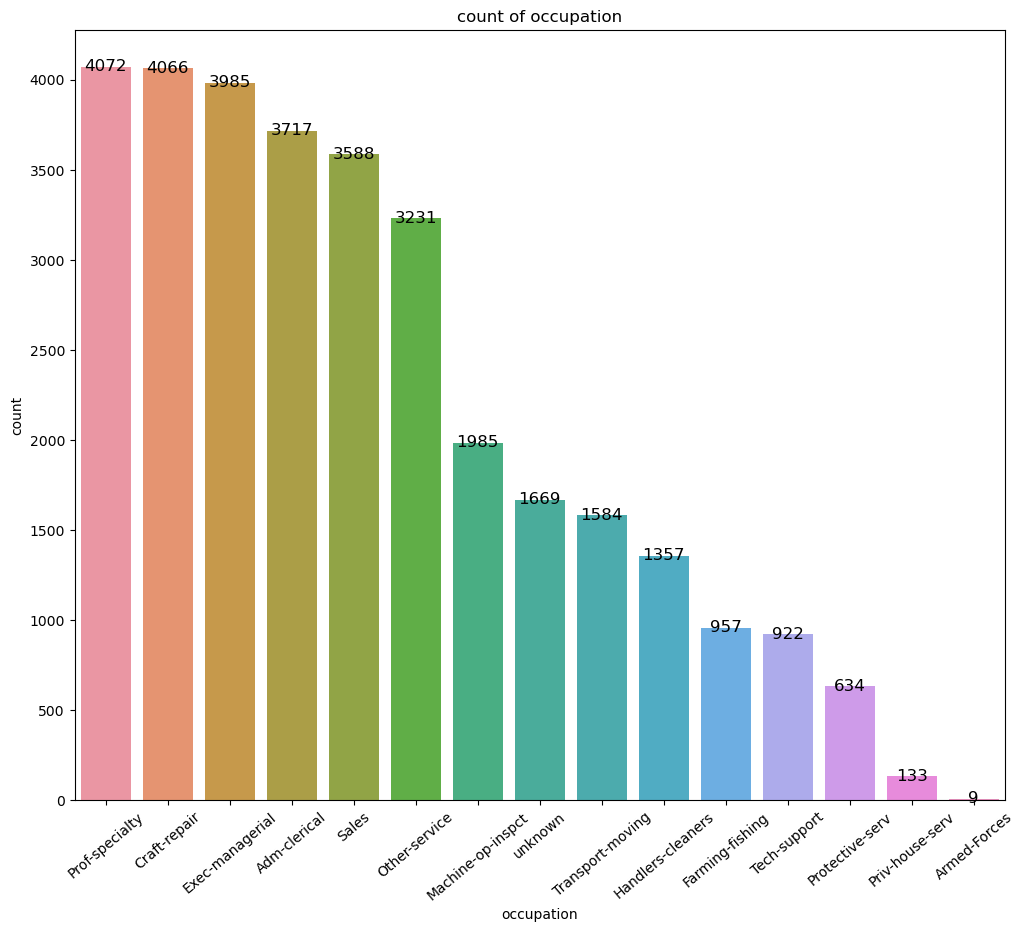

In [27]:
value_counts=df['occupation'].value_counts()
plt.figure(figsize=(12,10))
ax=sns.barplot(x=value_counts.index,y=value_counts.values)
plt.xlabel('occupation')
plt.ylabel('count')
plt.title('count of occupation')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',(p.get_x()+ p.get_width()/2.,p.get_height()),ha='center',va='center',fontsize=12,color='black')
plt.xticks(rotation=40)
plt.show()    

### relationship

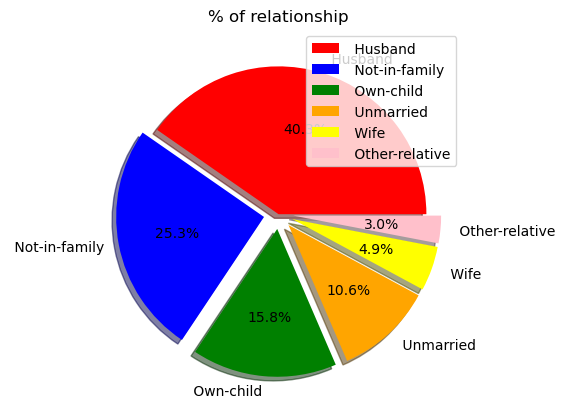

In [28]:
relationship=df['relationship'].value_counts()
colors=['red','blue','green','orange','yellow','pink']
explode=[0,0.1,0.1,0.1,0.1,0.1]
plt.pie(relationship,labels=relationship.index,colors=colors,explode=explode,shadow=True,autopct="%1.1f%%")
plt.title('% of relationship')
plt.legend(labels=relationship.index)
plt.show()

### race

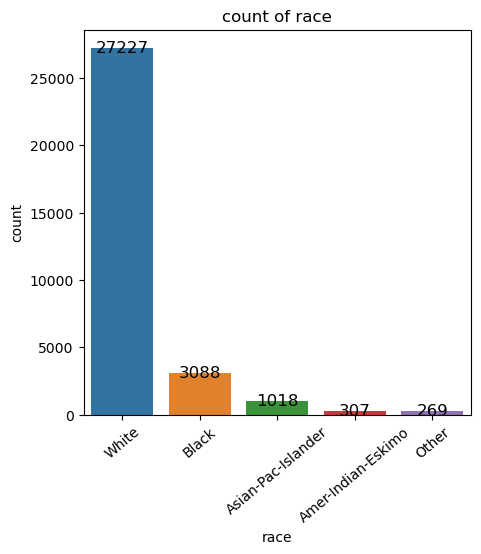

In [29]:
value_counts=df['race'].value_counts()
plt.figure(figsize=(5,5))
ax=sns.barplot(x=value_counts.index,y=value_counts.values)
plt.xlabel('race')
plt.ylabel('count')
plt.title('count of race')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',(p.get_x()+ p.get_width()/2.,p.get_height()),ha='center',va='center',fontsize=12,color='black')
plt.xticks(rotation=40)
plt.show()   

## sex

<AxesSubplot:>

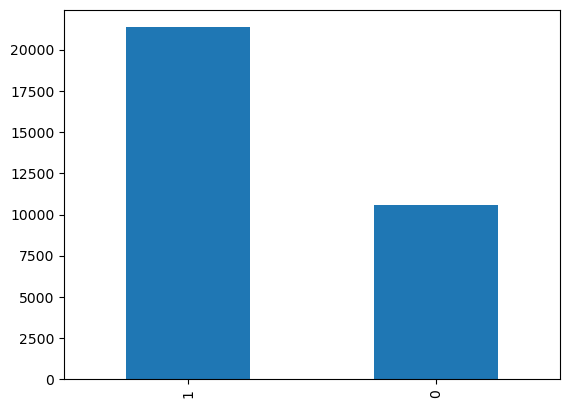

In [30]:
df['sex'].value_counts().plot(kind='bar')

## native-country

<AxesSubplot:>

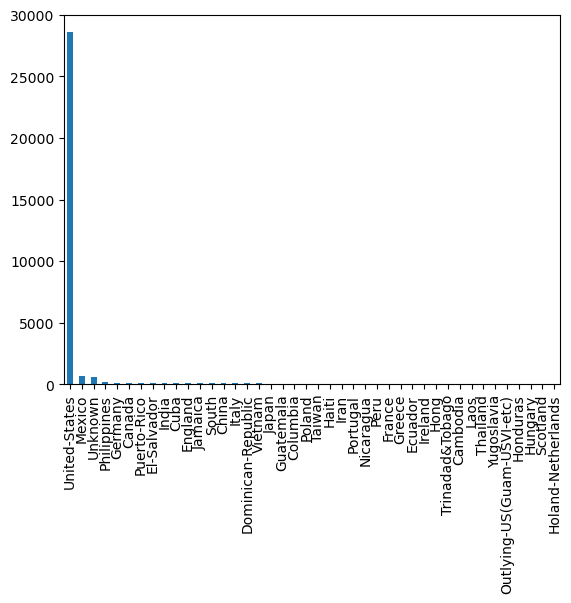

In [32]:
df['native-country'].value_counts().plot(kind='bar')

### income

<AxesSubplot:>

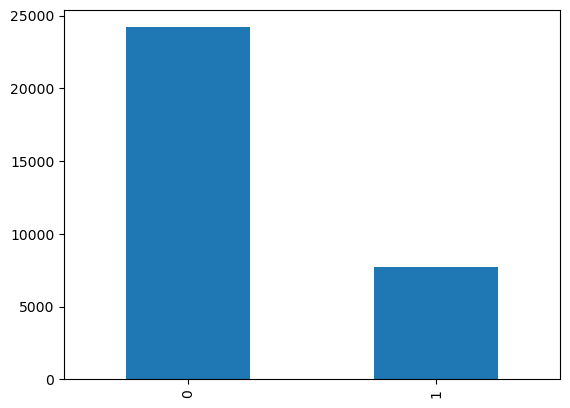

In [33]:
df['income'].value_counts().plot(kind='bar')

## hours-per-week

<AxesSubplot:>

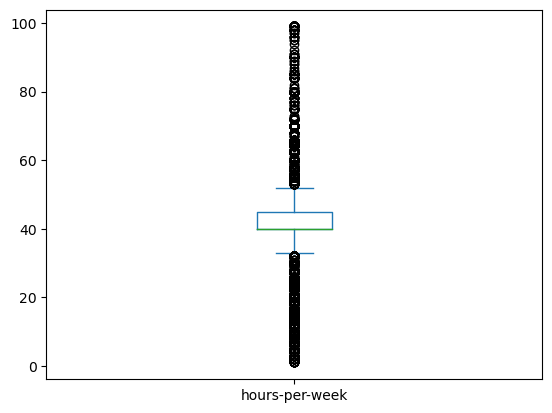

In [20]:
df['hours-per-week'].plot(kind='box')

In [21]:
Q1=df['hours-per-week'].quantile(0.25)
Q3=df['hours-per-week'].quantile(0.75)
IQR=Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR
df=df[(df['hours-per-week']>lb)&(df['hours-per-week']<ub)]

<AxesSubplot:>

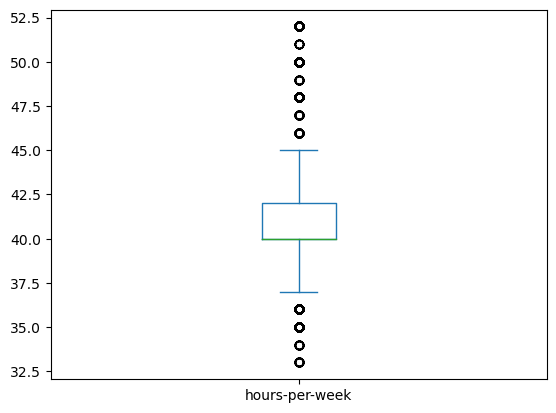

In [22]:
df['hours-per-week'].plot(kind='box')

## capital-gain

<AxesSubplot:>

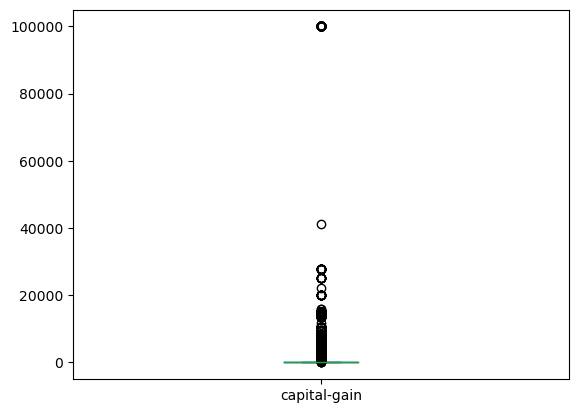

In [23]:
df['capital-gain'].plot(kind='box')

In [26]:
df=df[df['capital-gain']<15000]

<AxesSubplot:>

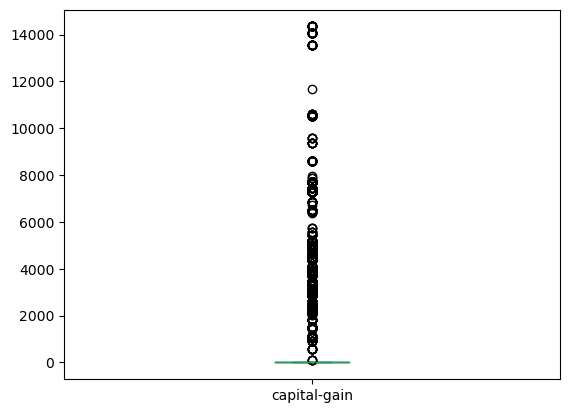

In [25]:
df['capital-gain'].plot(kind='box')

# Bivariate analysis

<AxesSubplot:title={'center':'age'}, xlabel='income'>

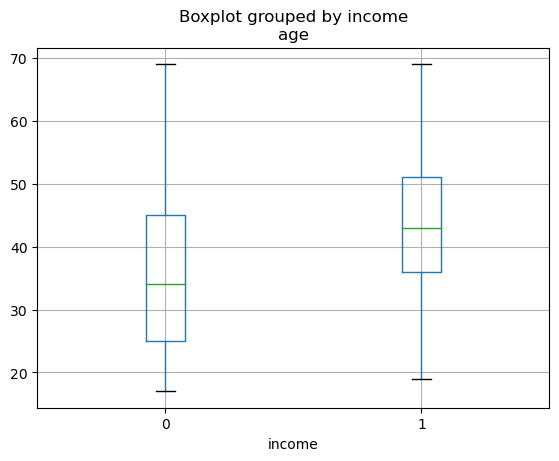

In [32]:
# age vs income
df.boxplot(by='income',column='age')

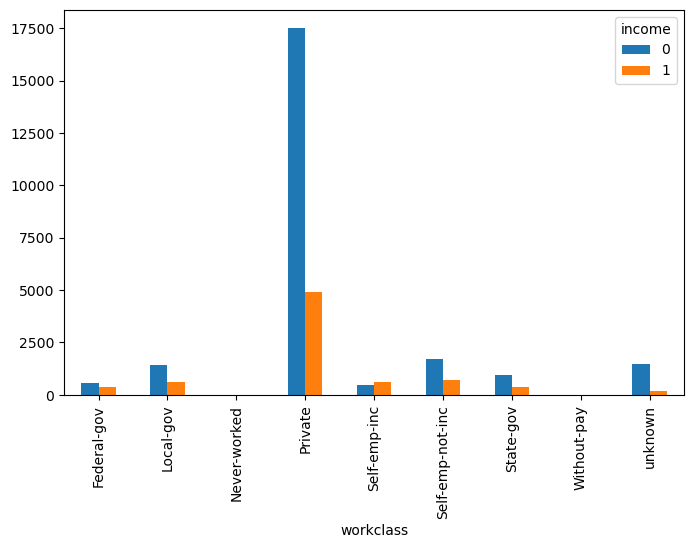

In [41]:
# Income vs workclass
pd.crosstab(index=df['workclass'],columns=df['income']).plot(kind='bar',figsize=(8,5))
plt.show()

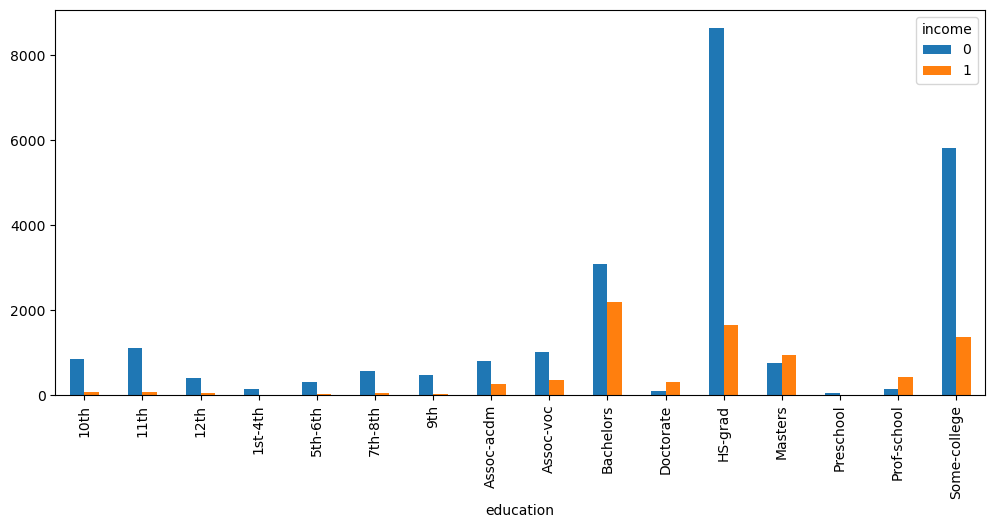

In [43]:
# Education vs income
pd.crosstab(index=df['education'],columns=df['income']).plot(kind='bar',figsize=(12,5))
plt.show()

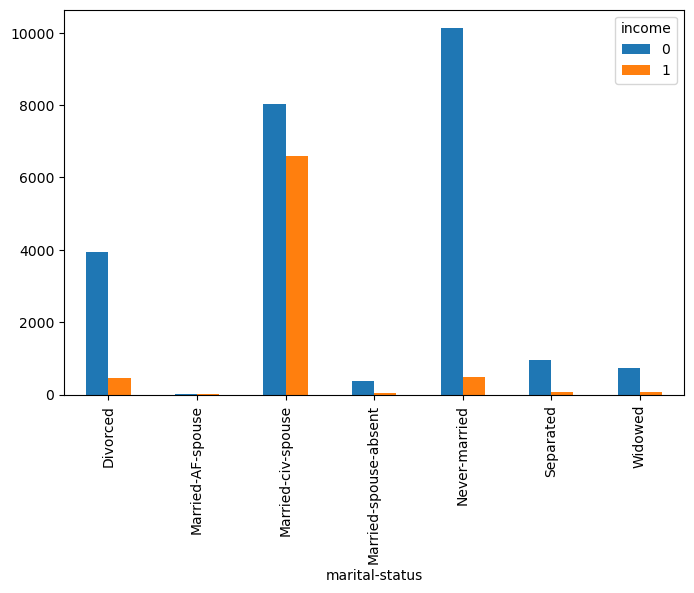

In [38]:
# marital-status vs income
pd.crosstab(index=df['marital-status'],columns=df['income']).plot(kind='bar',figsize=(8,5))
plt.show()

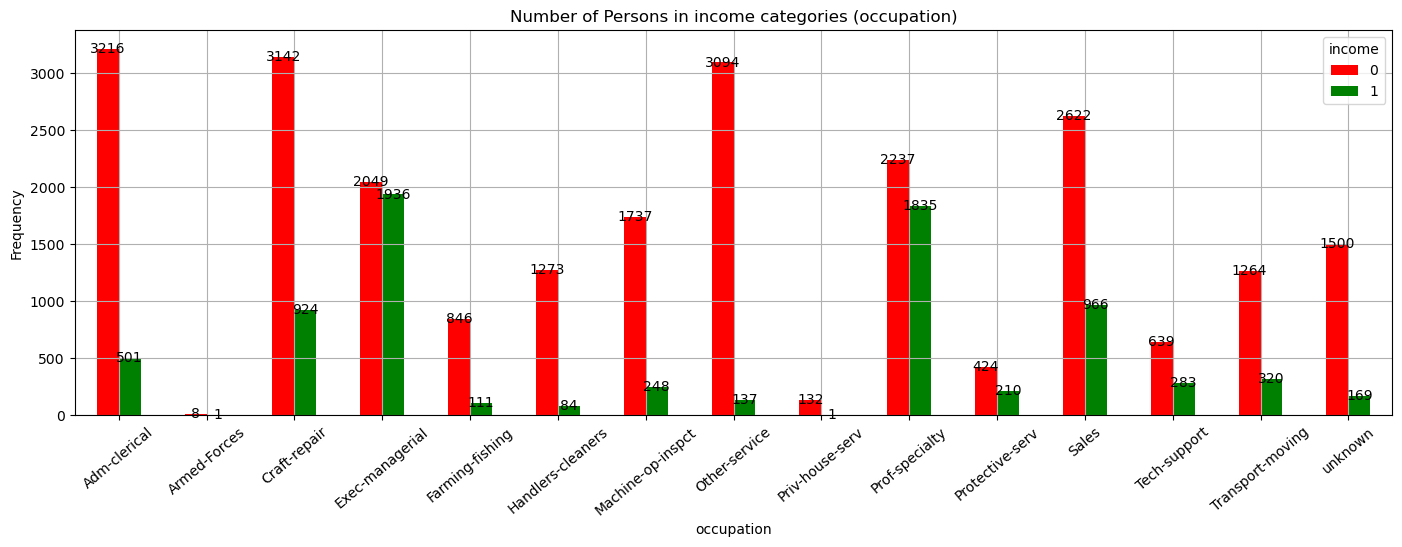

In [40]:
# occupation vs income

cross_tab = pd.crosstab(index=df['occupation'], columns=df['income'])
ax = cross_tab.plot(kind='bar', figsize=(17, 5), color=['red', 'green'], grid=True)

plt.title("Number of Persons in income categories (occupation)")
plt.xlabel("occupation")
plt.xticks(rotation=40)
plt.ylabel("Frequency")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black')

plt.show()

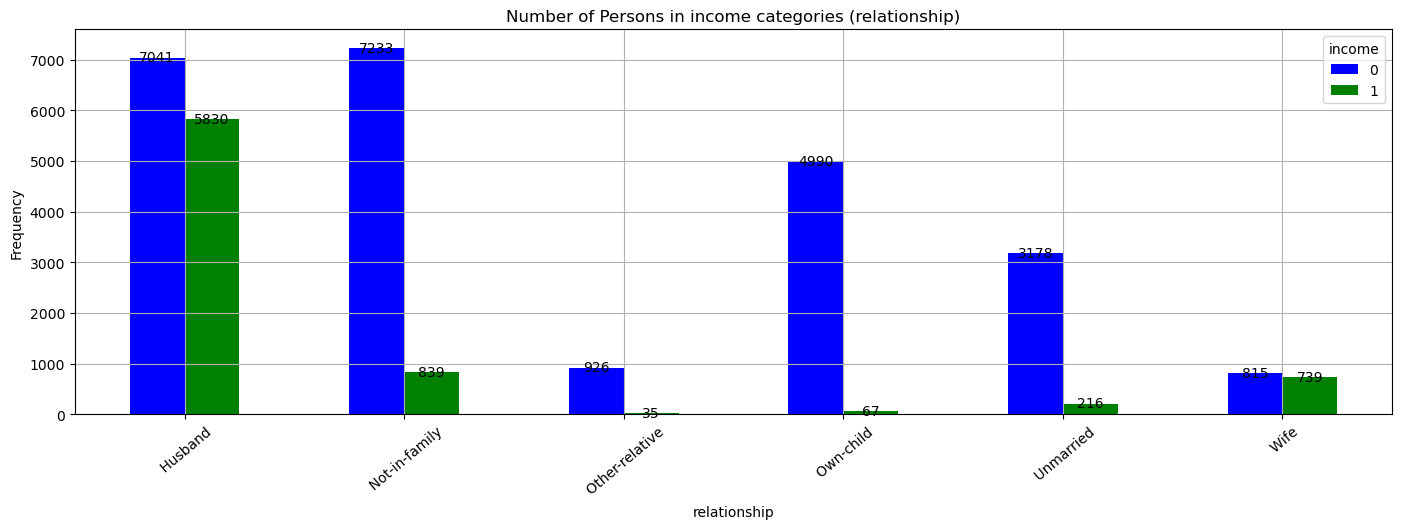

In [42]:
# relationship vs income
cross_tab = pd.crosstab(index=df['relationship'], columns=df['income'])
ax = cross_tab.plot(kind='bar', figsize=(17, 5), color=['blue', 'green'], grid=True)

plt.title("Number of Persons in income categories (relationship)")
plt.xlabel("relationship")
plt.xticks(rotation=40)
plt.ylabel("Frequency")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black')

plt.show()

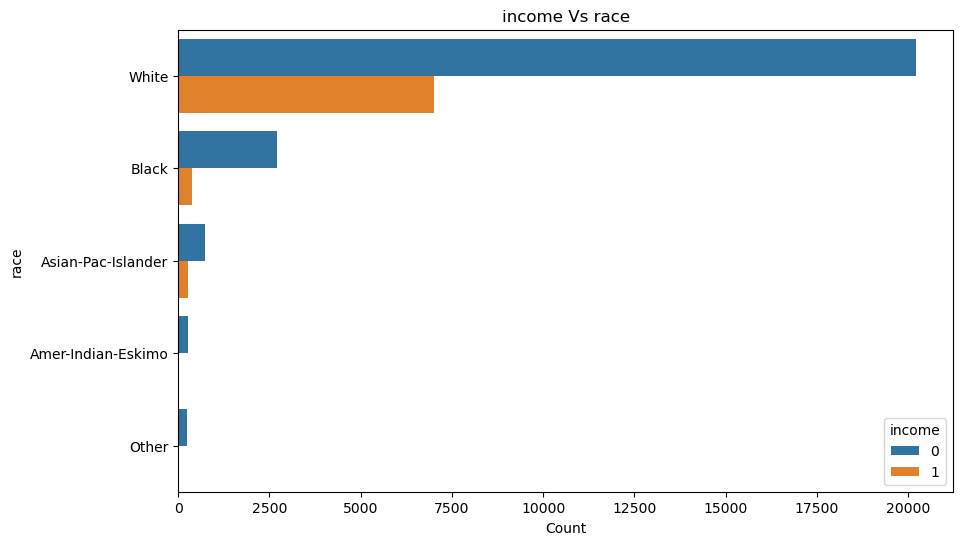

In [44]:
# income vs race
plt.figure(figsize=(10, 6)) 

sns.countplot(data=df, y='race', hue='income')

# Add labels and a title
plt.xlabel('Count')
plt.ylabel('race')
plt.title('income Vs race')

plt.show()

In [45]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


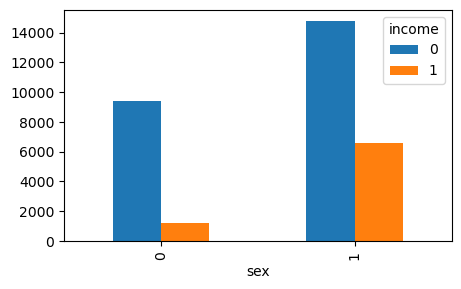

In [46]:
# sex vs income
pd.crosstab(index=df['sex'],columns=df['income']).plot(kind='bar',figsize=(5,3))
plt.show()

In [50]:
df.groupby(by=['marital-status','sex']).count()

age  workclass  fnlwgt  education  education-num  \
marital-status        sex                                                       
Divorced              0     2643       2643    2643       2643           2643   
                      1     1758       1758    1758       1758           1758   
Married-AF-spouse     0       13         13      13         13             13   
                      1        9          9       9          9              9   
Married-civ-spouse    0     1643       1643    1643       1643           1643   
                      1    12996      12996   12996      12996          12996   
Married-spouse-absent 0      201        201     201        201            201   
                      1      207        207     207        207            207   
Never-married         0     4740       4740    4740       4740           4740   
                      1     5877       5877    5877       5877           5877   
Separated             0      627        627     627        627            627   
                      1      392        392     392        392            392   
Widowed               0      686        686     686        686            686   
                      1      117        117     117        117            117   

                           occupation  relationship   race  capital-gain  \
marital-status        sex                                                  
Divorced              0          2643          2643   2643          2643   
                      1          1758          1758   1758          1758   
Married-AF-spouse     0            13            13     13            13   
                      1             9             9      9             9   
Married-civ-spouse    0          1643          1643   1643          1643   
                      1         12996         12996  12996         12996   
Married-spouse-absent 0           201           201    201           201   
                      1           207           207    207           207   
Never-married         0          4740          4740   4740          4740   
                      1          5877          5877   5877          5877   
Separated             0           627           627    627           627   
                      1           392           392    392           392   
Widowed               0           686           686    686           686   
                      1           117           117    117           117   

                           capital-loss  hours-per-week  native-country  \
marital-status        sex                                                 
Divorced              0            2643            2643            2643   
                      1            1758            1758            1758   
Married-AF-spouse     0              13              13              13   
                      1               9               9               9   
Married-civ-spouse    0            1643            1643            1643   
                      1           12996           12996           12996   
Married-spouse-absent 0             201             201             201   
                      1             207             207             207   
Never-married         0            4740            4740            4740   
                      1            5877            5877            5877   
Separated             0             627             627             627   
                      1             392             392             392   
Widowed               0             686             686             686   
                      1             117             117             117   

                           income  
marital-status        sex          
Divorced              0      2643  
                      1      1758  
Married-AF-spouse     0        13  
                      1         9  
Married-civ-spouse    0      1643  
                      1     12996  
Married-spouse-absent 0   

## The data is imbalance

In [ ]:
#pip install imblearn

In [ ]:
 #pip install --upgrade scikit-learn imbalanced-learn

In [ ]:
#from imblearn.over_sampling import SMOTE # SMOTE is a class
##s = SMOTE()
#X_train_transform,y_train = s.fit_resample(X_train_transform,y_train)

# Bulding model

In [27]:
# step-1
X = df.drop(columns=['income','fnlwgt','education','capital-loss'])
y = df.iloc[:,-1]

In [28]:
print(X.shape)
print(y.shape)

(22942, 11)
(22942,)


In [29]:
# step-2
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18353, 11)
(18353,)
(4589, 11)
(4589,)


In [31]:
# step-2.2
X_train_num=X_train.select_dtypes(include=['int32','int64','float'])
X_train_num.head()

,age,education-num,sex,capital-gain,hours-per-week
15197,42,4,0,0,48
24890,32,6,0,0,40
10278,32,13,1,0,40
9721,49,14,0,0,40
20630,34,10,1,0,40


In [32]:
# step-2.3
X_train_obj=X_train.select_dtypes(include=['object'])
X_train_obj.head()

,workclass,marital-status,occupation,relationship,race,native-country
15197,Private,Married-civ-spouse,Other-service,Other-relative,Asian-Pac-Islander,Unknown
24890,Private,Separated,Craft-repair,Unmarried,Black,Unknown
10278,Private,Married-civ-spouse,Prof-specialty,Other-relative,White,United-States
9721,State-gov,Divorced,Prof-specialty,Not-in-family,White,United-States
20630,Private,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Philippines


In [33]:
# step-2.4
X_test_num=X_test.select_dtypes(include=['int32','int64','float'])
X_test_num.head()

,age,education-num,sex,capital-gain,hours-per-week
16177,36,14,1,0,40
6074,55,7,0,0,40
2881,28,10,0,0,40
25505,28,12,0,0,40
21537,51,9,1,0,40


In [34]:
# step-2.5
X_test_obj=X_test.select_dtypes(include=['object'])
X_test_obj.head()

,workclass,marital-status,occupation,relationship,race,native-country
16177,Private,Married-civ-spouse,Prof-specialty,Husband,White,United-States
6074,Private,Widowed,Adm-clerical,Unmarried,White,United-States
2881,Private,Separated,Adm-clerical,Not-in-family,White,United-States
25505,Private,Married-civ-spouse,Exec-managerial,Wife,White,United-States
21537,unknown,Married-civ-spouse,unknown,Husband,White,United-States


In [35]:
# step-3.1
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train_num_res=pd.DataFrame(scale.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)
X_train_num_res.head()

,age,education-num,sex,capital-gain,hours-per-week
15197,0.305901,-2.418423,-1.471530,-0.23984,1.622071
24890,-0.537972,-1.621309,-1.471530,-0.23984,-0.385608
10278,-0.537972,1.168591,0.679565,-0.23984,-0.385608
9721,0.896612,1.567148,-1.471530,-0.23984,-0.385608
20630,-0.369197,-0.027080,0.679565,-0.23984,-0.385608


In [36]:
# step-3.3
from sklearn.preprocessing import OneHotEncoder
onh=OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore')
X_train_obj_onh=pd.DataFrame(onh.fit_transform(X_train_obj),columns=onh.get_feature_names_out(X_train_obj.columns),index=X_train_obj.index)
X_train_obj_onh.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_unknown,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
15197,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24890,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10278,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9721,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20630,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# step-3.4
X_train_transform=pd.concat([X_train_num_res,X_train_obj_onh],axis=1)
X_train_transform.head()

,age,education-num,sex,capital-gain,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
15197,0.305901,-2.418423,-1.471530,-0.23984,1.622071,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24890,-0.537972,-1.621309,-1.471530,-0.23984,-0.385608,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10278,-0.537972,1.168591,0.679565,-0.23984,-0.385608,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9721,0.896612,1.567148,-1.471530,-0.23984,-0.385608,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20630,-0.369197,-0.027080,0.679565,-0.23984,-0.385608,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# step-5.1
X_test_num_re=pd.DataFrame(scale.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)
X_test_num_re.head()

,age,education-num,sex,capital-gain,hours-per-week
16177,-0.200423,1.567148,0.679565,-0.23984,-0.385608
6074,1.402936,-1.222752,-1.471530,-0.23984,-0.385608
2881,-0.875521,-0.027080,-1.471530,-0.23984,-0.385608
25505,-0.875521,0.770034,-1.471530,-0.23984,-0.385608
21537,1.065387,-0.425637,0.679565,-0.23984,-0.385608


In [39]:
# step-5.2
X_test_obj_onh=pd.DataFrame(onh.transform(X_test_obj),columns=onh.get_feature_names_out(X_test_obj.columns),index=X_test_obj.index)
X_test_obj_onh.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_unknown,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
16177,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6074,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2881,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25505,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
# step-5.3
X_test_transform=pd.concat([X_test_num_re,X_test_obj_onh],axis=1)
X_test_transform.head()

,age,education-num,sex,capital-gain,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
16177,-0.200423,1.567148,0.679565,-0.23984,-0.385608,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6074,1.402936,-1.222752,-1.471530,-0.23984,-0.385608,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2881,-0.875521,-0.027080,-1.471530,-0.23984,-0.385608,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25505,-0.875521,0.770034,-1.471530,-0.23984,-0.385608,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21537,1.065387,-0.425637,0.679565,-0.23984,-0.385608,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
import tensorflow as tf
import keras_tuner as kt

from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

Using TensorFlow backend


In [42]:
# List of models with all initializations

def best_model(hp):
    model=Sequential()
    model.add(Input(shape=(X_train_transform.shape[1],)))
    
    for i in range(hp.Int("hiddenlayers",min_value=5,max_value=10)):
                model.add(Dense(units=hp.Int("neurons{}".format(i),min_value=1,max_value=15),activation="tanh",kernel_initializer=hp.Choice("weight_init",values=["glorot_uniform","glorot_normal","he_uniform","he_normal"])))
                model.add(BatchNormalization())             
                model.add(Dropout(rate=hp.Float("dropout", min_value=0.0, max_value=0.5)))            
    model.add(Dense(1,activation="sigmoid"))
    optimizer_choice = hp.Choice('optimizer', values=['sgd', 'adam', 'rmsprop', 'adadelta'])
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer_choice, metrics=['accuracy'])
    return model  


In [43]:
# List of models with all initializations
tuner=kt.RandomSearch(best_model,objective="val_accuracy",max_trials=5,directory=r"11_final",project_name="list_of_models_1")


In [44]:
# List of models with all initializations - Training
tuner.search(X_train_transform,y_train,epochs=10,validation_data=(X_test_transform,y_test))

Trial 5 Complete [00h 00m 56s]
val_accuracy: 0.7605142593383789

Best val_accuracy So Far: 0.8387448191642761
Total elapsed time: 00h 05m 28s


In [45]:
tuner.results_summary()

Results summary
Results in 11_final\list_of_models_1
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
hiddenlayers: 9
neurons0: 11
weight_init: glorot_uniform
dropout: 0.13272243386218896
neurons1: 1
neurons2: 6
neurons3: 6
neurons4: 15
optimizer: rmsprop
neurons5: 14
neurons6: 6
neurons7: 3
neurons8: 13
Score: 0.8387448191642761

Trial 1 summary
Hyperparameters:
hiddenlayers: 8
neurons0: 6
weight_init: he_normal
dropout: 0.3235506049353135
neurons1: 8
neurons2: 4
neurons3: 14
neurons4: 8
optimizer: adam
neurons5: 11
neurons6: 14
neurons7: 10
neurons8: 4
Score: 0.7875354290008545

Trial 0 summary
Hyperparameters:
hiddenlayers: 9
neurons0: 4
weight_init: he_uniform
dropout: 0.47178981542405063
neurons1: 15
neurons2: 3
neurons3: 7
neurons4: 9
optimizer: sgd
neurons5: 1
neurons6: 1
neurons7: 1
neurons8: 1
Score: 0.7605142593383789

Trial 2 summary
Hyperparameters:
hiddenlayers: 9
neurons0: 3
weight_init: he_uniform
dropout: 0.1487598

In [46]:
# Best hyper parameters
tuner.get_best_hyperparameters()[0].values

{'hiddenlayers': 9,
 'neurons0': 11,
 'weight_init': 'glorot_uniform',
 'dropout': 0.13272243386218896,
 'neurons1': 1,
 'neurons2': 6,
 'neurons3': 6,
 'neurons4': 15,
 'optimizer': 'rmsprop',
 'neurons5': 14,
 'neurons6': 6,
 'neurons7': 3,
 'neurons8': 13}

In [47]:
# Best model is saved to variable
fmodel = tuner.get_best_models(num_models=1)[0]

In [48]:
fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                924       
                                                                 
 batch_normalization (Batch  (None, 11)                44        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 11)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
 batch_normalization_1 (Bat  (None, 1)                 4         
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 1)                 0

In [49]:
hist=fmodel.fit(X_train_transform,y_train,batch_size=15,epochs=20,validation_split=0.15)

Epoch 1/20
1040/1040 [==============================] - 16s 9ms/step - loss: 0.4287 - accuracy: 0.8017 - val_loss: 0.3640 - val_accuracy: 0.8402
Epoch 2/20
1040/1040 [==============================] - 9s 9ms/step - loss: 0.4250 - accuracy: 0.8017 - val_loss: 0.3668 - val_accuracy: 0.8409
Epoch 3/20
1040/1040 [==============================] - 9s 8ms/step - loss: 0.4280 - accuracy: 0.8041 - val_loss: 0.3675 - val_accuracy: 0.8394
Epoch 4/20
1040/1040 [==============================] - 9s 9ms/step - loss: 0.4239 - accuracy: 0.8021 - val_loss: 0.3630 - val_accuracy: 0.8402
Epoch 5/20
1040/1040 [==============================] - 9s 9ms/step - loss: 0.4247 - accuracy: 0.8054 - val_loss: 0.3584 - val_accuracy: 0.8394
Epoch 6/20
1040/1040 [==============================] - 9s 9ms/step - loss: 0.4229 - accuracy: 0.8053 - val_loss: 0.3653 - val_accuracy: 0.8369
Epoch 7/20
1040/1040 [==============================] - 9s 9ms/step - loss: 0.4222 - accuracy: 0.8051 - val_loss: 0.3562 - val_accuracy

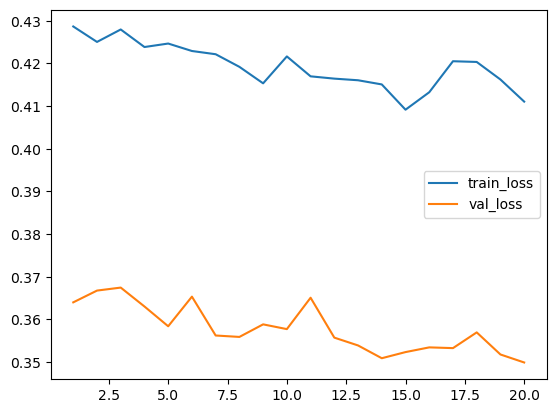

In [50]:
# Train and validate loss trade off
plt.plot(range(1,21),hist.history["loss"],label="train_loss")
plt.plot(range(1,21),hist.history["val_loss"],label="val_loss")
plt.legend()

In [51]:
hist.history['val_loss']

[0.36401084065437317,
 0.3667658269405365,
 0.3674684464931488,
 0.363037645816803,
 0.35840287804603577,
 0.3653448522090912,
 0.3562382161617279,
 0.35590365529060364,
 0.358848512172699,
 0.35773515701293945,
 0.3650916516780853,
 0.3557394742965698,
 0.3539053201675415,
 0.3509114682674408,
 0.3523499071598053,
 0.3534529507160187,
 0.3532811105251312,
 0.35696884989738464,
 0.35178911685943604,
 0.3499147295951843]

In [52]:
predicted=fmodel.predict(X_test_transform)

144/144 [==============================] - 1s 4ms/step


In [53]:
predicted=np.where(predicted>=0.5,1,0)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print('accuracy:',accuracy_score(y_test,predicted))

accuracy: 0.8426672477663979


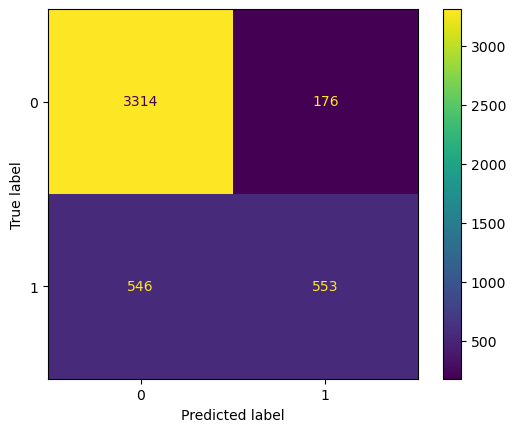

In [55]:
cm = confusion_matrix(y_test,predicted)
va = ConfusionMatrixDisplay(cm)
va.plot()
plt.show()